# **Coursework 1: Convolution & Kernels**

## **1. Preparation**

In [10]:
import copy
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

**Define two 3x3 smoothing kernels - one for average blurring and another for weighted average blurring**:

In [11]:
average_smoothing = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]])
# Then normalisation:
average_smoothing = (1/9) * average_smoothing


weighted_average_smoothing = np.array([[1, 2, 1],
                                       [2, 4, 2],
                                       [1, 2, 1]])
# Normalisation
weighted_average_smoothing = (1/16) * weighted_average_smoothing

**Use Sobel operator for edge detection:**

In [12]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

**Next, define functions for:  
1) padding  
2) kernel looping  
3) handle values that are not in the range [0, 255]  
4) perform thresholding  
5) plot an image's histogram**

In [13]:
# 1) Take an image array of size (m,n), return an image of size (m+2, n+2) with padded zeros
def padding(image_array):
    padded_array = copy.deepcopy(image_array)

    # Pad two zero rows at top & bottom:
    cols = padded_array.shape[1]
    zero_row = np.zeros((1, cols))
    padded_array = np.vstack((zero_row, padded_array, zero_row))

    # Pad two zero columns at left & right:
    rows = padded_array.shape[0]
    zero_column = np.zeros((rows, 1))
    padded_array = np.hstack((zero_column, padded_array, zero_column))

    return padded_array

# 2) Take an image (2D array) of original size for output, and a padded version of the original image and a 3x3 kernel for calculation
def kernel_looping(img, padded, kernel):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # the same pixel in the padded image has coordinates (i+1, j+1)
            img[i][j] = (
                padded[i][j] * kernel[0][0] + padded[i][j+1] * kernel[0][1] + padded[i][j+2] * kernel[0][2] +
                padded[i+1][j] * kernel[1][0] + padded[i+1][j+1] * kernel[1][1] + padded[i+1][j+2] * kernel[1][2] +
                padded[i+2][j] * kernel[2][0] + padded[i+2][j+1] * kernel[2][1] + padded[i+2][j+2] * kernel[2][2]
            )

    return img

# 3) Handle values not in [0, 255] using clipping or rescaling, assuming the input image array has data type 'float'
def handle_outsiders(img, method='clip'):
    # First, convert the float array to integer array
    img = img.astype(np.int32)

    # Second, handle values not in [0, 255], based on input 'method' parameter
    if method == 'clip':
        img = np.clip(img, 0, 255)

    elif method == 'rescale':
        img = 255 * (img - img.min()) / (img.max() - img.min())

    else:
        raise ValueError("Invalid method")

    # Third, since all values are integers in [0, 255], it's safe to convert the data type to uint8 for display later
    img = img.astype(np.uint8)

    return img

# 4)
def thresholding(ori_img, t):
    img = copy.deepcopy(ori_img)

    img[img <= t] = 0
    img[img > t] = 255

    return img

# 5) Plot a histogram to find a proper threshold value
def histogram(img):
    plt.hist(img.ravel(), bins=256, range=[0,255], width=3)
    plt.title('Histogram')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')
    plt.show()

## **2. Use the average smoothing kernel**

**Firstly, import the image, convert it into a numpy 2D array and apply the average smoothing kernel on it:**

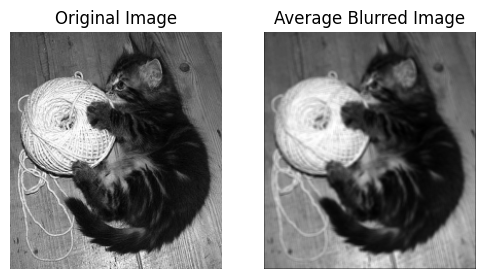

In [14]:
original_image = np.array(Image.open('kitty.bmp'))

average_blurred_image = np.zeros((original_image.shape[0], original_image.shape[1]))
average_blurred_image = kernel_looping(average_blurred_image, padding(original_image), average_smoothing)
average_blurred_image = handle_outsiders(average_blurred_image)

# Plot the two images:
plt.figure(figsize=(6, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(average_blurred_image, cmap='gray')
plt.axis('off')
plt.title('Average Blurred Image')

plt.show()

**Next, apply the two Sobel operators to obtain two gradient images wrt x- and y-axis respectively, and compute the combined image pixel by pixel using the formula:
$$
G_{combined} = \sqrt{G_x^2 + G_y^2}
$$**

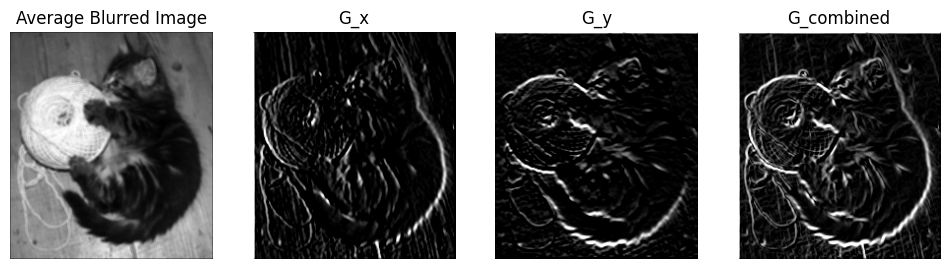

In [15]:
average_gradient_x = np.zeros((original_image.shape[0], original_image.shape[1]))
average_gradient_y = np.zeros((original_image.shape[0], original_image.shape[1]))
average_gradient_combined = np.zeros((original_image.shape[0], original_image.shape[1]))

average_gradient_x = kernel_looping(average_gradient_x, padding(average_blurred_image), sobel_x)
average_gradient_x = handle_outsiders(average_gradient_x)

average_gradient_y = kernel_looping(average_gradient_y, padding(average_blurred_image), sobel_y)
average_gradient_y = handle_outsiders(average_gradient_y)

# Calculate the combined edge strength image
for i in range(average_gradient_combined.shape[0]):
        for j in range(average_gradient_combined.shape[1]):
            average_gradient_combined[i][j] = math.sqrt((average_gradient_x[i][j] ** 2) + (average_gradient_y[i][j] ** 2))

average_gradient_combined = handle_outsiders(average_gradient_combined)

# Plot:
plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.imshow(average_blurred_image, cmap='gray')
plt.axis('off')
plt.title('Average Blurred Image')

plt.subplot(1, 4, 2)
plt.imshow(average_gradient_x, cmap='gray')
plt.axis('off')
plt.title('G_x')

plt.subplot(1, 4, 3)
plt.imshow(average_gradient_y, cmap='gray')
plt.axis('off')
plt.title('G_y')

plt.subplot(1, 4, 4)
plt.imshow(average_gradient_combined, cmap='gray')
plt.axis('off')
plt.title('G_combined')

plt.show()

**Lastly, perform thresholding on the edge strength image to show major edges with the help of its histogram figure:**

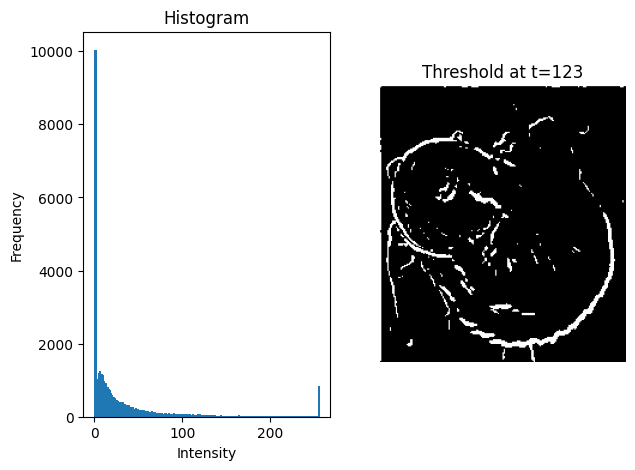

In [16]:
t_avg = 123
average_threshold = thresholding(average_gradient_combined, t_avg)

plt.figure(figsize=(7, 5))

plt.subplot(1, 2, 1)
plt.hist(average_gradient_combined.ravel(), bins=256, range=[0,255], width=2.5)
plt.title('Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.imshow(average_threshold, cmap='gray')
plt.axis('off')
plt.title('Threshold at t=' + str(t_avg))

plt.show()

## **3. Use the weighted average smoothing kernel**

**Apply the same steps as in 2, except using the weighted average smoothing kernel this time:**

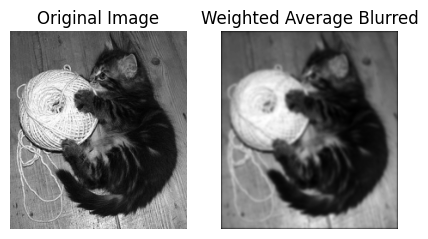

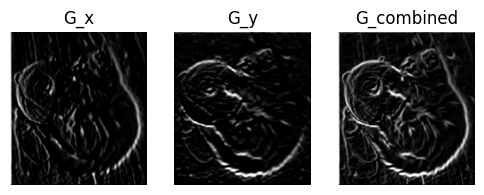

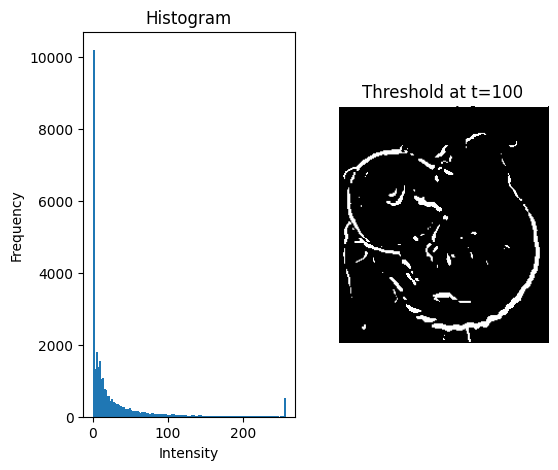

In [17]:
weighted_blurred_image = np.zeros((original_image.shape[0], original_image.shape[1]))
weighted_gradient_x = np.zeros((original_image.shape[0], original_image.shape[1]))
weighted_gradient_y = np.zeros((original_image.shape[0], original_image.shape[1]))
weighted_gradient_combined = np.zeros((original_image.shape[0], original_image.shape[1]))

weighted_blurred_image = kernel_looping(weighted_blurred_image, padding(original_image), weighted_average_smoothing)
weighted_blurred_image = handle_outsiders(weighted_blurred_image)
weighted_blurred_image = kernel_looping(weighted_blurred_image, padding(weighted_blurred_image), weighted_average_smoothing)
weighted_blurred_image = handle_outsiders(weighted_blurred_image)
weighted_blurred_image = kernel_looping(weighted_blurred_image, padding(weighted_blurred_image), weighted_average_smoothing)
weighted_blurred_image = handle_outsiders(weighted_blurred_image)

weighted_gradient_x = kernel_looping(weighted_gradient_x, padding(weighted_blurred_image), sobel_x)
weighted_gradient_x = handle_outsiders(weighted_gradient_x)
weighted_gradient_y = kernel_looping(weighted_gradient_y, padding(weighted_blurred_image), sobel_y)
weighted_gradient_y = handle_outsiders(weighted_gradient_y)

for i in range(weighted_gradient_combined.shape[0]):
        for j in range(weighted_gradient_combined.shape[1]):
            weighted_gradient_combined[i][j] = math.sqrt((weighted_gradient_x[i][j] ** 2) + (weighted_gradient_y[i][j] ** 2))
weighted_gradient_combined = handle_outsiders(weighted_gradient_combined)

# Plot original image and weighted average blurred image:
plt.figure(figsize=(5, 4))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(weighted_blurred_image, cmap='gray')
plt.axis('off')
plt.title('Weighted Average Blurred')
plt.show()

# Plot three gradient images:
plt.figure(figsize=(6, 4))
plt.subplot(1, 3, 1)
plt.imshow(weighted_gradient_x, cmap='gray')
plt.axis('off')
plt.title('G_x')
plt.subplot(1, 3, 2)
plt.imshow(weighted_gradient_y, cmap='gray')
plt.axis('off')
plt.title('G_y')
plt.subplot(1, 3, 3)
plt.imshow(weighted_gradient_combined, cmap='gray')
plt.axis('off')
plt.title('G_combined')
plt.show()

# Plot histogram and the image after thresholding:
t_wei = 100
weighted_threshold = thresholding(weighted_gradient_combined, t_wei)

plt.figure(figsize=(6, 5))

plt.subplot(1, 2, 1)
plt.hist(weighted_gradient_combined.ravel(), bins=256, range=[0,255], width=2.5)
plt.title('Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.imshow(weighted_threshold, cmap='gray')
plt.axis('off')
plt.title('Threshold at t=' + str(t_wei))

plt.show()

## **4. Comparison and conclusion**

**Given a 3x3 average smoothing kernel and a 3x3 approximation of the Gaussian smoothing kernel with sigma set to 1, the results are quite close, though the weighted kernel still has advantages in balancing noise reduction and edge preservation, as shown below. The image produced using the average kernel exhibits more dot noise around the center of the knitting ball and more discontinuities along the back of the kitty, while the weighted smoothing kernel reduces smaller-scale noise more effectively, with most of the cat's back edges being preserved.**


**Although the average smoothing kernel is easy to implement and can often produce a reasonable result, the fact that the only adjustable parameter for an average kernel is the kernel size (since all neighbors are treated equally) limits its flexibility and usage scenarios.**

**On the contrary, the weighted (Gaussian) smoothing kernel gives more weight to pixels closer to the center of the kernel. This results in a smoother transition and can help preserve edges better because it reduces the blurring effect across edges by weighting the central pixels more heavily. Additionally, Gaussian smoothing allows for the selection of the extent of blurring and spreading by adjusting the sigma value, offering more flexibility for fine-tuning based on various applications or different characteristics of images.**

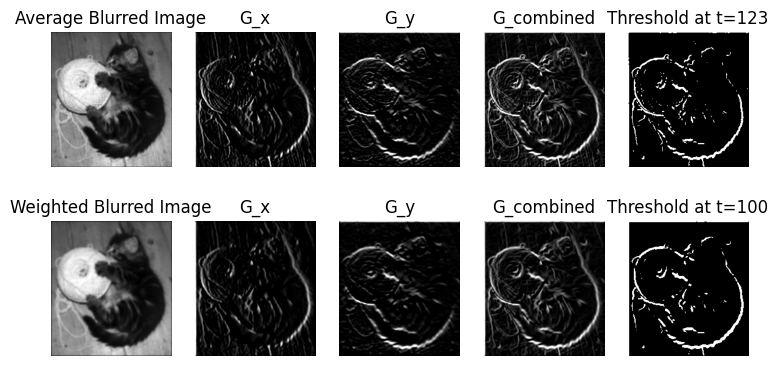

In [18]:
plt.figure(figsize=(9, 4.5))

plt.subplot(2, 5, 1)
plt.imshow(average_blurred_image, cmap='gray')
plt.axis('off')
plt.title('Average Blurred Image')

plt.subplot(2, 5, 2)
plt.imshow(average_gradient_x, cmap='gray')
plt.axis('off')
plt.title('G_x')

plt.subplot(2, 5, 3)
plt.imshow(average_gradient_y, cmap='gray')
plt.axis('off')
plt.title('G_y')

plt.subplot(2, 5, 4)
plt.imshow(average_gradient_combined, cmap='gray')
plt.axis('off')
plt.title('G_combined')

plt.subplot(2, 5, 5)
plt.imshow(average_threshold, cmap='gray')
plt.axis('off')
plt.title('Threshold at t=' + str(t_avg))

plt.subplot(2, 5, 6)
plt.imshow(weighted_blurred_image, cmap='gray')
plt.axis('off')
plt.title('Weighted Blurred Image')

plt.subplot(2, 5, 7)
plt.imshow(weighted_gradient_x, cmap='gray')
plt.axis('off')
plt.title('G_x')

plt.subplot(2, 5, 8)
plt.imshow(weighted_gradient_y, cmap='gray')
plt.axis('off')
plt.title('G_y')

plt.subplot(2, 5, 9)
plt.imshow(weighted_gradient_combined, cmap='gray')
plt.axis('off')
plt.title('G_combined')

plt.subplot(2, 5, 10)
plt.imshow(weighted_threshold, cmap='gray')
plt.axis('off')
plt.title('Threshold at t=' + str(t_wei))

plt.show()